# Assignment: Statistical and Probabilistic Analysis of Spotify Popularity

## Part 1: Descriptive Statistics Analysis

### 1. Data Loading and Preparation

In [47]:

import pandas as pd
import numpy as np

# Intentamos cargar el CSV
csv_path = "Spotify_2024.csv"
def load_csv_with_fallback(path):
    try:
        return pd.read_csv(path)
    except UnicodeDecodeError:
        return pd.read_csv(path, encoding="latin1")

raw_df = load_csv_with_fallback(csv_path)

# Creamos una copia para trabajar sobre ella y mantener el raw intacto
df = raw_df.copy()

# Convertimos la columna de fecha a formato datetime para un mejor manejo posterior
if "Release Date" in df.columns:
    df["Release Date"] = pd.to_datetime(df["Release Date"], errors="coerce")

# Columnas mínimas necesarias para la Parte 1
main_columns = [
    "Spotify Streams",
    "YouTube Views",
    "Spotify Popularity",
]

# Columnas adicionales que también son relevantes para el análisis
extra_columns = [
    "All Time Rank",
    "Track Score",
    "Spotify Playlist Count",
    "Spotify Playlist Reach",
    "YouTube Likes",
    "TikTok Posts",
    "TikTok Likes",
    "TikTok Views",
    "AirPlay Spins",
    "SiriusXM Spins",
    "Deezer Playlist Count",
    "Deezer Playlist Reach",
    "Amazon Playlist Count",
    "Pandora Streams",
    "Pandora Track Stations",
    "Soundcloud Streams",
    "Shazam Counts",
]

# Seleccionamos únicamente las columnas que sí existen en el dataset
numeric_cols = [c for c in (main_columns + extra_columns) if c in df.columns]
# Definimos el conjunto de columnas numéricas candidatas para imputación y chequeos
candidate_numeric_cols = numeric_cols.copy()

# Definimos una función para limpiar columnas con comas y convertirlas a float
def to_numeric_clean(series: pd.Series) -> pd.Series:
    if pd.api.types.is_numeric_dtype(series):
        return pd.to_numeric(series, errors="coerce")
    return pd.to_numeric(series.astype(str).str.replace(",", "", regex=False).str.strip(),
                         errors="coerce")

# Realizamos la conversión de todas las columnas numéricas identificadas
for col in numeric_cols:
    df[col] = to_numeric_clean(df[col])

# Normalizamos la columna "Explicit Track" para que quede en valores binarios (0/1)
if "Explicit Track" in df.columns:
    mapping = {"true": 1, "false": 0, "yes": 1, "no": 0, "1": 1, "0": 0}
    df["Explicit Track"] = df["Explicit Track"].astype(str).str.lower().map(mapping)
    unmapped_mask = df["Explicit Track"].isna()
    if unmapped_mask.any():
        df.loc[unmapped_mask, "Explicit Track"] = pd.to_numeric(
            raw_df.loc[unmapped_mask, "Explicit Track"], errors="coerce"
        )
    df["Explicit Track"] = df["Explicit Track"].fillna(0).astype(int)

# Eliminamos "TIDAL Popularity" ya que no contiene información útil
if "TIDAL Popularity" in df.columns:
    if df["TIDAL Popularity"].notna().sum() == 0:
        df.drop(columns=["TIDAL Popularity"], inplace=True)

# Imputamos valores nulos en columnas numéricas utilizando la mediana
for col in candidate_numeric_cols:
    med = df[col].median(skipna=True)
    df[col] = df[col].fillna(med)

In [48]:
df

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26,QM24S2402528,1,725.4,3.904709e+08,30716.0,196631588.0,...,40975.0,684.0,62.0,17598718.0,114.0,18004655.0,22931.0,4818457.0,2669262.0,0
1,Not Like Us,Not Like Us,Kendrick Lamar,2024-05-04,USUG12400910,2,545.9,3.237039e+08,28113.0,174597137.0,...,40778.0,3.0,67.0,10422430.0,111.0,7780028.0,28444.0,6623075.0,1118279.0,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,2024-03-19,QZJ842400387,3,538.4,6.013093e+08,54331.0,211607669.0,...,74333.0,536.0,136.0,36321847.0,172.0,5022621.0,5639.0,7208651.0,5285340.0,0
3,Flowers,Flowers - Single,Miley Cyrus,2023-01-12,USSM12209777,4,444.9,2.031281e+09,269802.0,136569078.0,...,1474799.0,2182.0,264.0,24684248.0,210.0,190260277.0,203384.0,3224599.0,11822942.0,0
4,Houdini,Houdini,Eminem,2024-05-31,USUG12403398,5,423.3,1.070349e+08,7223.0,151469874.0,...,12185.0,1.0,82.0,17660624.0,105.0,4493884.0,7006.0,207179.0,457017.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,For the Last Time,For the Last Time,$uicideboy$,2017-09-05,QM8DG1703420,4585,19.4,3.050500e+08,65770.0,5103054.0,...,6.0,86.0,2.0,14217.0,17.0,20104066.0,13184.0,50633006.0,656337.0,1
4596,Dil Meri Na Sune,"Dil Meri Na Sune (From ""Genius"")",Atif Aslam,2018-07-27,INT101800122,4575,19.4,5.228236e+07,4602.0,1449767.0,...,412.0,86.0,1.0,927.0,17.0,12735768.5,7832.0,3224599.0,193590.0,0
4597,Grace (feat. 42 Dugg),My Turn,Lil Baby,2020-02-28,USUG12000043,4571,19.4,1.899727e+08,72066.0,6704802.0,...,204.0,86.0,1.0,74.0,6.0,84426740.0,28999.0,3224599.0,1135998.0,1
4598,Nashe Si Chadh Gayi,November Top 10 Songs,Arijit Singh,2016-11-08,INY091600067,4591,19.4,1.454670e+08,14037.0,7387064.0,...,1200.0,86.0,15.0,237120.5,7.0,6817840.0,7832.0,3224599.0,448292.0,0


In [49]:
# Revisamos cómo quedaron los tipos de datos
print("Tipos de datos en columnas clave:\n",
      df[candidate_numeric_cols + (["Explicit Track"] if "Explicit Track" in df.columns else [])].dtypes, "\n")

Tipos de datos en columnas clave:
 Spotify Streams           float64
YouTube Views             float64
Spotify Popularity        float64
All Time Rank               int64
Track Score               float64
Spotify Playlist Count    float64
Spotify Playlist Reach    float64
YouTube Likes             float64
TikTok Posts              float64
TikTok Likes              float64
TikTok Views              float64
AirPlay Spins             float64
SiriusXM Spins            float64
Deezer Playlist Count     float64
Deezer Playlist Reach     float64
Amazon Playlist Count     float64
Pandora Streams           float64
Pandora Track Stations    float64
Soundcloud Streams        float64
Shazam Counts             float64
Explicit Track              int64
dtype: object 



In [50]:
# Verificamos que no queden nulos en las columnas seleccionadas
print("Nulos restantes en columnas numéricas relevantes:\n",
      df[candidate_numeric_cols].isna().sum(), "\n")

Nulos restantes en columnas numéricas relevantes:
 Spotify Streams           0
YouTube Views             0
Spotify Popularity        0
All Time Rank             0
Track Score               0
Spotify Playlist Count    0
Spotify Playlist Reach    0
YouTube Likes             0
TikTok Posts              0
TikTok Likes              0
TikTok Views              0
AirPlay Spins             0
SiriusXM Spins            0
Deezer Playlist Count     0
Deezer Playlist Reach     0
Amazon Playlist Count     0
Pandora Streams           0
Pandora Track Stations    0
Soundcloud Streams        0
Shazam Counts             0
dtype: int64 



In [51]:
# Mostramos una vista previa de las columnas principales para la Parte 1
print("Vista previa de columnas esenciales (head):")
available_main = [c for c in main_columns if c in df.columns]
if available_main:
    display(df[available_main].head())
else:
    print("Ninguna de las columnas principales está presente en el dataset.")


Vista previa de columnas esenciales (head):


,Spotify Streams,YouTube Views,Spotify Popularity
0,3.904709e+08,8.427475e+07,92.0
1,3.237039e+08,1.163470e+08,92.0
2,6.013093e+08,1.225991e+08,92.0
3,2.031281e+09,1.096101e+09,85.0
4,1.070349e+08,7.737396e+07,88.0


In [52]:
# Guardamos el dataset limpio y preparado
display(df.shape)
df.to_csv("Spotify_2024_limpio.csv", index=False)

(4600, 28)

### 2. Visualizing Data Distributions

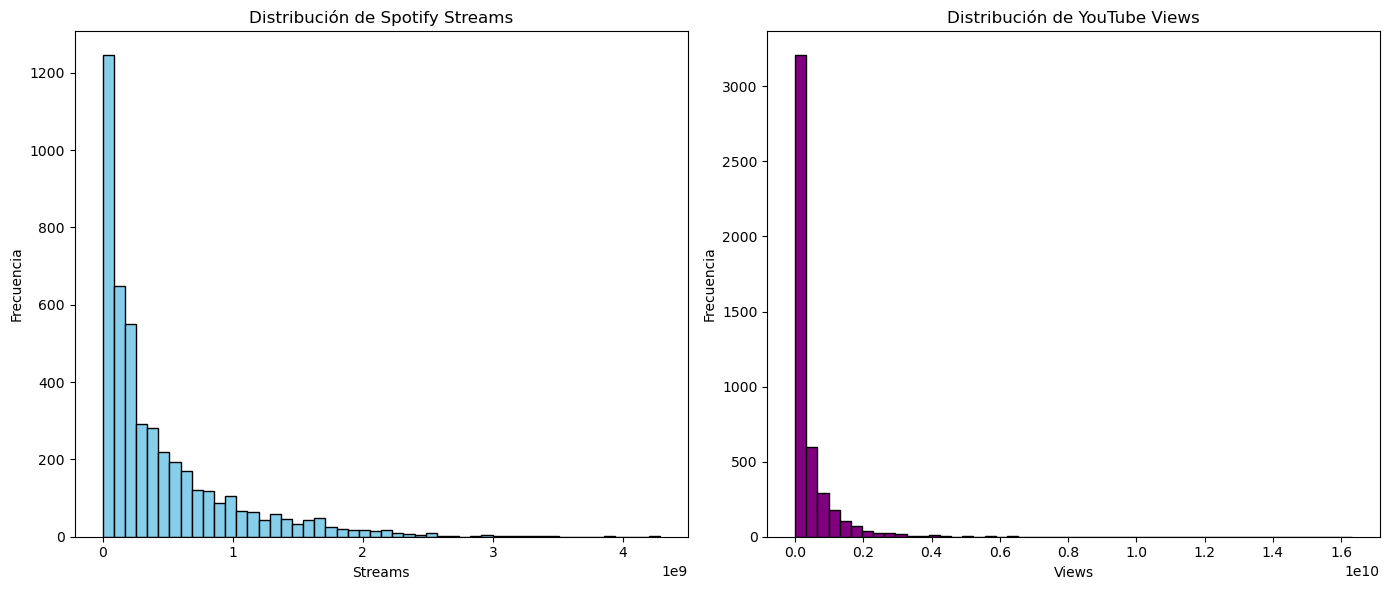

In [53]:
import matplotlib.pyplot as plt

# Creamos histogramas de las dos variables pedidas
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Histograma de Spotify Streams
axes[0].hist(df["Spotify Streams"], bins=50, color="skyblue", edgecolor="black")
axes[0].set_title("Distribución de Spotify Streams")
axes[0].set_xlabel("Streams")
axes[0].set_ylabel("Frecuencia")

# Histograma de YouTube Views
axes[1].hist(df["YouTube Views"], bins=50, color="purple", edgecolor="black")
axes[1].set_title("Distribución de YouTube Views")
axes[1].set_xlabel("Views")
axes[1].set_ylabel("Frecuencia")

plt.tight_layout()
plt.show()

### 3. Measures of Central Tendency

In [54]:

# Calculamos la media y la mediana de Spotify Streams y YouTube Views
mean_streams = df["Spotify Streams"].mean()
median_streams = df["Spotify Streams"].median()

mean_views = df["YouTube Views"].mean()
median_views = df["YouTube Views"].median()

print("Spotify Streams:")
print(f"  Media   = {mean_streams:,.0f}")
print(f"  Mediana = {median_streams:,.0f}\n")

print("YouTube Views:")
print(f"  Media   = {mean_views:,.0f}")
print(f"  Mediana = {median_views:,.0f}\n")


Spotify Streams:
  Media   = 442,289,133
  Mediana = 239,850,720

YouTube Views:
  Media   = 385,754,478
  Mediana = 148,269,610



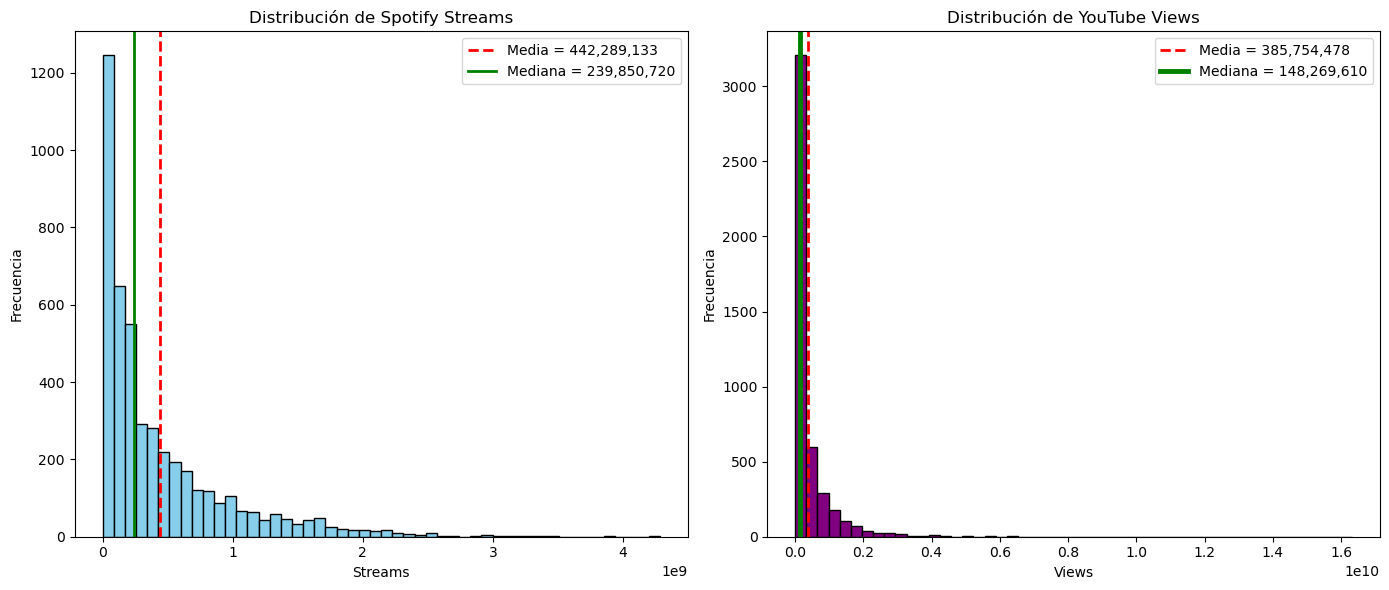

In [55]:
# Creamos histogramas con líneas de media y mediana
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Spotify Streams
axes[0].hist(df["Spotify Streams"], bins=50, color="skyblue", edgecolor="black")
axes[0].axvline(mean_streams, color="red", linestyle="dashed", linewidth=2, label=f"Media = {mean_streams:,.0f}")
axes[0].axvline(median_streams, color="green", linestyle="solid", linewidth=2, label=f"Mediana = {median_streams:,.0f}")
axes[0].set_title("Distribución de Spotify Streams")
axes[0].set_xlabel("Streams")
axes[0].set_ylabel("Frecuencia")
axes[0].legend()

# YouTube Views
axes[1].hist(df["YouTube Views"], bins=50, color="purple", edgecolor="black")
axes[1].axvline(mean_views, color="red", linestyle="dashed", linewidth=2, label=f"Media = {mean_views:,.0f}")
axes[1].axvline(median_views, color="green", linestyle="solid", linewidth=3.5, label=f"Mediana = {median_views:,.0f}")
axes[1].set_title("Distribución de YouTube Views")
axes[1].set_xlabel("Views")
axes[1].set_ylabel("Frecuencia")
axes[1].legend()

plt.tight_layout()
plt.show()

### 4. Measures of Dispersion and Relative Variability 

In [56]:
# Columnas que vamos a analizar
cols = ["Spotify Popularity", "Spotify Streams", "YouTube Views"]

# Calculamos desviación estándar y coeficiente de variación
dispersion = pd.DataFrame({
    "Desviación Estándar": [df[c].std() for c in cols],
    "Media": [df[c].mean() for c in cols]
}, index=cols)

# Agregamos el Coeficiente de Variación (CV = std / mean)
dispersion["Coeficiente de Variación"] = dispersion["Desviación Estándar"] / dispersion["Media"]

print("Resumen de medidas de dispersión y variabilidad:\n")
print(dispersion, "\n")



Resumen de medidas de dispersión y variabilidad:

                    Desviación Estándar         Media  \
Spotify Popularity         1.476358e+01  6.411304e+01   
Spotify Streams            5.327575e+08  4.422891e+08   
YouTube Views              6.809681e+08  3.857545e+08   

                    Coeficiente de Variación  
Spotify Popularity                  0.230274  
Spotify Streams                     1.204546  
YouTube Views                       1.765289   



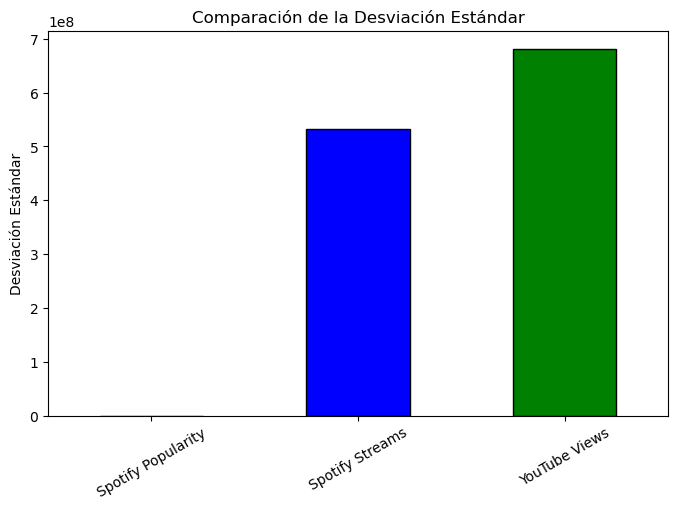

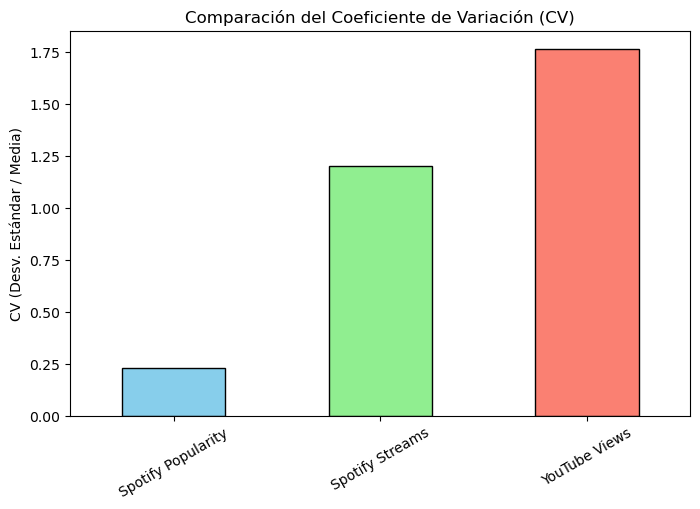

In [57]:
# ---------- Gráfica de desviación estándar ----------
plt.figure(figsize=(8, 5))
dispersion["Desviación Estándar"].plot(kind="bar", color=["orange", "blue", "green"], edgecolor="black")
plt.title("Comparación de la Desviación Estándar")
plt.ylabel("Desviación Estándar")
plt.xticks(rotation=30)
plt.show()


# Visualización del Coeficiente de Variación
plt.figure(figsize=(8, 5))
dispersion["Coeficiente de Variación"].plot(kind="bar", color=["skyblue", "lightgreen", "salmon"], edgecolor="black")
plt.title("Comparación del Coeficiente de Variación (CV)")
plt.ylabel("CV (Desv. Estándar / Media)")
plt.xticks(rotation=30)
plt.show()

## Part 2: Probabilistic Analysis with Bayes Theorem

### 1. Defining Events

In [58]:
# Creamos el evento A: canciones con alta popularidad (>= 85 en Spotify Popularity)
df["High_Popularity"] = (df["Spotify Popularity"] >= 85).astype(int)

# (0 = No popular, 1 = Popular)
# (0 = No explícita, 1 = Explícita).
print("Valores únicos en Explicit Track:", df["Explicit Track"].unique())
print("Valores únicos en High_Popularity:", df["High_Popularity"].unique())


Valores únicos en Explicit Track: [0 1]
Valores únicos en High_Popularity: [1 0]


In [59]:
# Vista previa para confirmar
display(df[["Spotify Popularity", "Explicit Track", "High_Popularity"]].head(30))

,Spotify Popularity,Explicit Track,High_Popularity
0,92.0,0,1
1,92.0,1,1
2,92.0,0,1
3,85.0,0,1
4,88.0,1,1
5,83.0,1,0
6,86.0,0,1
7,92.0,1,1
8,67.0,1,0
9,86.0,1,1


### 2. Calculating Prior Probabilities

In [62]:

# Verificamos que existan las columnas creadas en 2.1
assert "High_Popularity" in df.columns, "Falta la columna High_Popularity (A)."
assert "Explicit Track" in df.columns, "Falta la columna Explicit Track (B)."

# Construimos conteos básicos
n   = len(df)
nA  = (df["High_Popularity"] == 1).sum()                     # |A|
nB  = (df["Explicit Track"] == 1).sum()                      # |B|
nAB = ((df["High_Popularity"] == 1) & (df["Explicit Track"] == 1)).sum()  # |A∩B|

# Probabilidades por frecuencia (sin usar mean)
P_A = nA / n if n > 0 else np.nan
P_B = nB / n if n > 0 else np.nan
P_A_given_B = (nAB / nB) if nB > 0 else np.nan              # P(A|B)

# Bayes: P(B|A) = [P(A|B) * P(B)] / P(A)
P_B_given_A_bayes = (P_A_given_B * P_B / P_A) if (P_A > 0) else np.nan

# Cálculo directo de P(B|A) por conteos (para validar Bayes)
P_B_given_A_direct = (nAB / nA) if nA > 0 else np.nan

print("=== Conteos básicos ===")
print(f"n   = {n}      (Num. total de canciones)")
print(f"|A|  = {nA}   (High_Popularity=1)")
print(f"|B|  = {nB}   (Explicit=1)")
print(f"|A∩B|= {nAB}\n")

print("=== Probabilidades (vía conteos) ===")
print(f"P(A)        = {P_A:.4f}     (Num. canciones con alta popularidad / Total)")
print(f"P(B)        = {P_B:.4f}     (Num. canciones explícitas / Total)")
print(f"P(A|B)      = {P_A_given_B:.4f}     (Num. canciones con alta popularidad y explícitas / Num. canciones explícitas)")

print("\n=== Bayes y validación ===")
print(f"P(B|A) (Bayes)  = {P_B_given_A_bayes:.4f}     (Usando Teorema de Bayes)")
print(f"P(B|A) (Direct) = {P_B_given_A_direct:.4f}    (Cálculo directo por conteos)")

print("\n=== Tabla de contingencia A vs B ===")
contingency = pd.crosstab(df["High_Popularity"], df["Explicit Track"])
display(contingency)

=== Conteos básicos ===
n   = 4600      (Num. total de canciones)
|A|  = 54   (High_Popularity=1)
|B|  = 1651   (Explicit=1)
|A∩B|= 18

=== Probabilidades (vía conteos) ===
P(A)        = 0.0117     (Num. canciones con alta popularidad / Total)
P(B)        = 0.3589     (Num. canciones explícitas / Total)
P(A|B)      = 0.0109     (Num. canciones con alta popularidad y explícitas / Num. canciones explícitas)

=== Bayes y validación ===
P(B|A) (Bayes)  = 0.3333     (Usando Teorema de Bayes)
P(B|A) (Direct) = 0.3333    (Cálculo directo por conteos)

=== Tabla de contingencia A vs B ===


Explicit Track,0,1
High_Popularity,,
0,2913,1633
1,36,18



=== Heatmap de contingencia A vs B ===


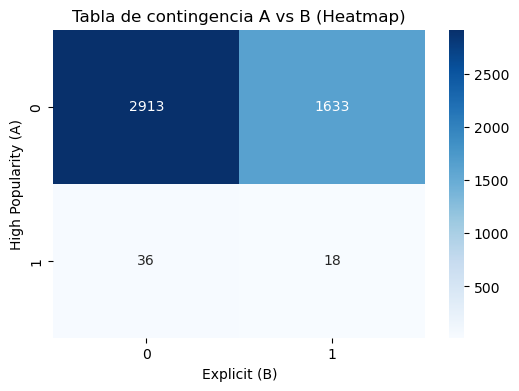

In [63]:
print("\n=== Heatmap de contingencia A vs B ===")

import seaborn as sns

plt.figure(figsize=(6,4))
sns.heatmap(contingency, annot=True, fmt="d", cmap="Blues")
plt.title("Tabla de contingencia A vs B (Heatmap)")
plt.ylabel("High Popularity (A)")
plt.xlabel("Explicit (B)")
plt.show()

### 3. Applying Bayes Theorem

In [64]:
import numpy as np
import pandas as pd

# Aseguramos que A esté creado (por si se ejecuta este bloque de forma aislada)
if "High_Popularity" not in df.columns:
    df["High_Popularity"] = (df["Spotify Popularity"] >= 85).astype(int)

# Conteos base
n   = len(df)
nA  = (df["High_Popularity"] == 1).sum()                           # |A|
nB  = (df["Explicit Track"] == 1).sum()                            # |B|
nAB = ((df["High_Popularity"] == 1) & (df["Explicit Track"] == 1)).sum()  # |A ∩ B|

# Probabilidades por frecuencia
P_A = nA / n if n > 0 else np.nan
P_B = nB / n if n > 0 else np.nan
P_A_given_B = (nAB / nB) if nB > 0 else np.nan                     # P(A|B)

# Bayes: P(B|A) = [P(A|B) * P(B)] / P(A)
P_B_given_A_bayes = (P_A_given_B * P_B / P_A) if P_A > 0 else np.nan

# Validación directa (por conteo): P(B|A) = |A ∩ B| / |A|
P_B_given_A_direct = (nAB / nA) if nA > 0 else np.nan

# Helper de impresión en porcentaje
fmt_pct = lambda x: (f"{100*x:.2f}%" if pd.notnull(x) else "NaN")

print("=== Conteos ===")
print(f"n   = {n}")
print(f"|A|  = {nA}   (High_Popularity=1)")
print(f"|B|  = {nB}   (Explicit=1)")
print(f"|A∩B|= {nAB}\n")

print("=== Probabilidades (frecuencia) ===")
print(f"P(A)       = {P_A:.6f}  ({fmt_pct(P_A)})")
print(f"P(B)       = {P_B:.6f}  ({fmt_pct(P_B)})")
print(f"P(A|B)     = {P_A_given_B:.6f}  ({fmt_pct(P_A_given_B)})\n")

# Mostrar la fórmula de Bayes con sustitución numérica
print("=== Bayes: P(B|A) ===")
print("Fórmula:   P(B|A) = [ P(A|B) * P(B) ] / P(A)")
print(f"Sustitución: P(B|A) = [ {P_A_given_B:.6f} * {P_B:.6f} ] / {P_A:.6f}")
print(f"Resultado (Bayes) : P(B|A) = {P_B_given_A_bayes:.6f}  ({fmt_pct(P_B_given_A_bayes)})")
print(f"Resultado (Direct): P(B|A) = {P_B_given_A_direct:.6f}  ({fmt_pct(P_B_given_A_direct)})\n")

# Comparación posterior vs. prior
if pd.notnull(P_B_given_A_bayes) and pd.notnull(P_B):
    diff = P_B_given_A_bayes - P_B
    tendencia = "MÁS" if diff > 0 else ("MENOS" if diff < 0 else "IGUAL DE")
    print("=== Interpretación ===")
    print(f"Comparado con el prior P(B)={fmt_pct(P_B)}, el posterior P(B|A)={fmt_pct(P_B_given_A_bayes)} es {tendencia} probable.")
    print("En otras palabras:", 
          "saber que la canción es MUY popular incrementa la probabilidad de que sea explícita."
          if diff > 0 else
          ("saber que la canción es MUY popular reduce la probabilidad de que sea explícita."
           if diff < 0 else
           "saber que la canción es MUY popular no cambia la probabilidad de que sea explícita."))


=== Conteos ===
n   = 4600
|A|  = 54   (High_Popularity=1)
|B|  = 1651   (Explicit=1)
|A∩B|= 18

=== Probabilidades (frecuencia) ===
P(A)       = 0.011739  (1.17%)
P(B)       = 0.358913  (35.89%)
P(A|B)     = 0.010902  (1.09%)

=== Bayes: P(B|A) ===
Fórmula:   P(B|A) = [ P(A|B) * P(B) ] / P(A)
Sustitución: P(B|A) = [ 0.010902 * 0.358913 ] / 0.011739
Resultado (Bayes) : P(B|A) = 0.333333  (33.33%)
Resultado (Direct): P(B|A) = 0.333333  (33.33%)

=== Interpretación ===
Comparado con el prior P(B)=35.89%, el posterior P(B|A)=33.33% es MENOS probable.
En otras palabras: saber que la canción es MUY popular reduce la probabilidad de que sea explícita.
